## How IMDB Ratings are Related to Movies and Metascore

---

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Seaborn settings to improve plot quality
sns.set_style('whitegrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'}) # whitegrid background with plot-side lines
plt.rcParams["patch.force_edgecolor"]=True # make bar lines in bar plots visible

In [30]:
# read scraped and cleaned data from csv file
df = pd.read_csv('movie_by_votes.csv', index_col=0)
df.head()

,movie,imdb,metascore,votes,gross,year
0,The Shawshank Redemption,9.3,80,1838073,28341469,1994
1,The Dark Knight,9.0,82,1817974,533316061,2008
2,Inception,8.8,74,1608158,292568851,2010
3,Fight Club,8.8,66,1473065,37023395,1999
4,Pulp Fiction,8.9,94,1438920,107930000,1994


---

### IMDB vs Metascore Ratings

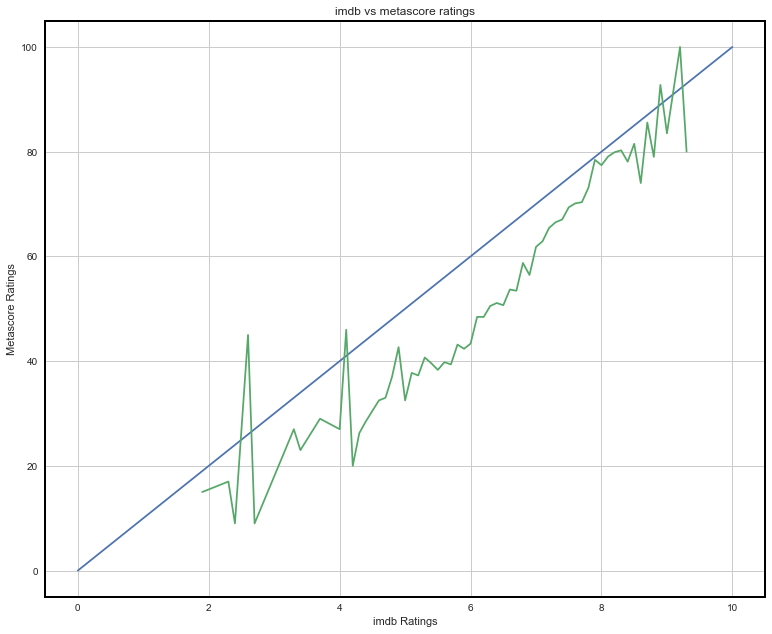

In [31]:
# imdb vs metascore
fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(range(0,11), [i*10 for i in range(0,11)])
ax2.plot(df.groupby('imdb').mean()['metascore'])
ax2.set_title('imdb vs metascore ratings')
ax2.set_xlabel('imdb Ratings')
ax2.set_ylabel('Metascore Ratings')

In [32]:
# Function to convert imdb ratings into discrete values
def imdb_box(row):
    if row%1 > 0.5:
        return int(row) + 1
    else:
        return int(row)

In [33]:
# creating new column in dataframe with discrete rating values. e.g. 6.5 <= rating < 7.5 becomes 7.
df.loc[:,'imdb_slots'] = df['imdb'].apply(imdb_box)

In [34]:
df.head()

,movie,imdb,metascore,votes,gross,year,imdb_slots
0,The Shawshank Redemption,9.3,80,1838073,28341469,1994,9
1,The Dark Knight,9.0,82,1817974,533316061,2008,9
2,Inception,8.8,74,1608158,292568851,2010,9
3,Fight Club,8.8,66,1473065,37023395,1999,9
4,Pulp Fiction,8.9,94,1438920,107930000,1994,9


In [35]:
# finding average metascore for each discrete imdb rating.
imdb_discrete = df.groupby('imdb_slots').mean()['metascore']
imdb_discrete

imdb_slots
2    13.666667
3    26.000000
4    28.500000
5    38.342593
6    47.210181
7    61.447396
8    74.838521
9    82.000000
Name: metascore, dtype: float64

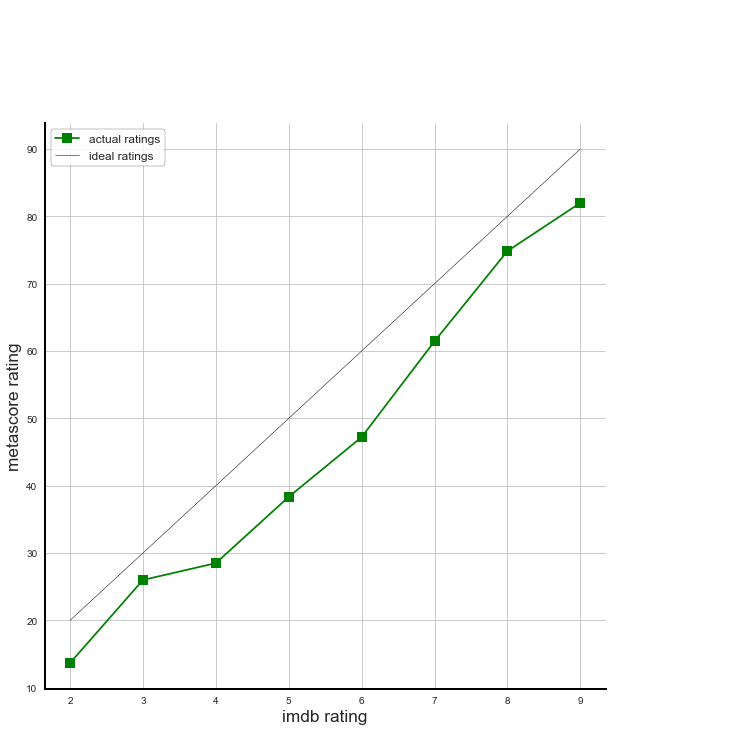

In [36]:
# plotting average metascore for each discrete imdb rating. 

grid = sns.JointGrid(x=imdb_discrete.index.values, y=imdb_discrete.values, size=10)
grid.plot_joint(plt.plot, color="g", marker='s', markersize=10, label='actual ratings')

# adding straight line represnting ideal relationship between imdb ratings and metascore. i.e. imdb 7 rating = 70 metascore.
plt.plot(imdb_discrete.index.values, imdb_discrete.index.values*10, linewidth=0.5, color='black', label='ideal ratings')
grid.ax_marg_x.set_axis_off() #disabling side x-axis plot
grid.ax_marg_y.set_axis_off() #disabling side y-axis plot

# adding x and y axis labels and legend.
plt.xlabel('imdb rating', fontsize='xx-large')
plt.ylabel('metascore rating', fontsize='xx-large')
plt.legend(loc='best', fontsize='large', frameon=True, edgecolor='black')

In general, IMDB ratings are more lenient than that of Metascore.

---

### Ratings vs Number of Votes
Are people more likely to vote to appreciate or criticize?

In [37]:
# calculating average number of votes per movie for each discrete imdb rating.
votes_rating = df.groupby('imdb_slots').mean()['votes']
votes_rating

imdb_slots
2    7.947333e+04
3    7.733475e+04
4    9.902457e+04
5    1.014581e+05
6    1.159584e+05
7    1.605913e+05
8    3.027187e+05
9    1.029001e+06
Name: votes, dtype: float64

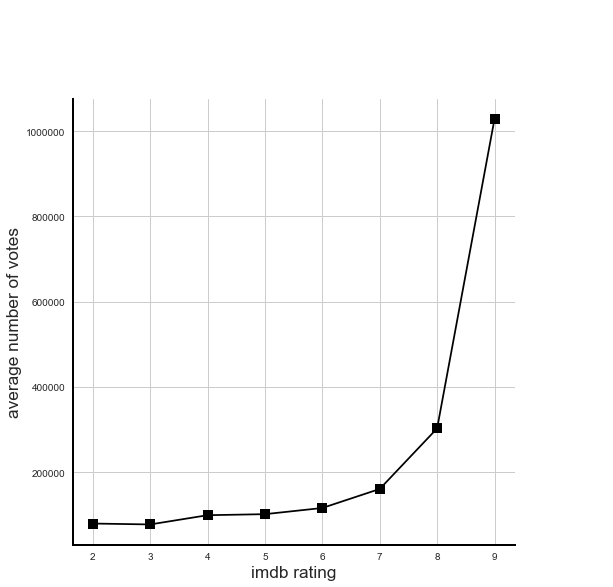

In [38]:
# plotting average number of votes per movie for each discrete imdb rating.

grid2 = sns.JointGrid(x=votes_rating.index.values, y=votes_rating.values, size=8)
grid2.plot_joint(plt.plot, color="black", marker='s', markersize=10)
grid2.ax_marg_x.set_axis_off()
grid2.ax_marg_y.set_axis_off()
plt.xlabel('imdb rating', fontsize='xx-large')
plt.ylabel('average number of votes', fontsize='xx-large')

On average, people are more likely to vote to appreciate a movie.

---

### Ratings vs Gross Revenue

In [39]:
# calculating average gorss income per movie for each discrete imdb slot.
gross_rating = df.groupby('imdb_slots').mean()['gross']
gross_rating

imdb_slots
2    2.512799e+07
3    4.048577e+07
4    6.072970e+07
5    7.601692e+07
6    7.337273e+07
7    7.656850e+07
8    8.855825e+07
9    1.556915e+08
Name: gross, dtype: float64

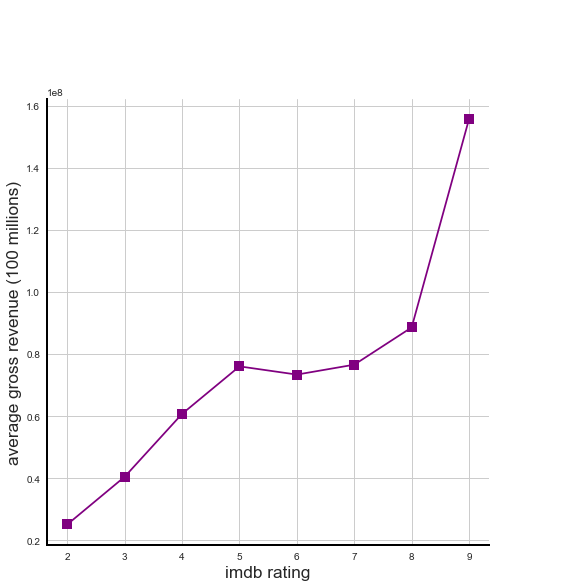

In [40]:
# plotting average gorss income per movie for each discrete imdb slot.

grid3 = sns.JointGrid(x=gross_rating.index.values, y=gross_rating.values, size=8)
grid3.plot_joint(plt.plot, color="purple", marker='s', markersize=10)
grid3.ax_marg_x.set_axis_off()
grid3.ax_marg_y.set_axis_off()
plt.xlabel('imdb rating', fontsize='xx-large')
plt.ylabel('average gross revenue (100 millions)', fontsize='xx-large')

Public appreciation is likely to be resulted in good box office returns.

---

### Average Rating for Recent Years

In [41]:
# Number of distinct years in list
len(df['year'].unique())

62

In [42]:
df.sort_values(by='year')['year'].unique()

array([1927, 1936, 1939, 1954, 1959, 1960, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

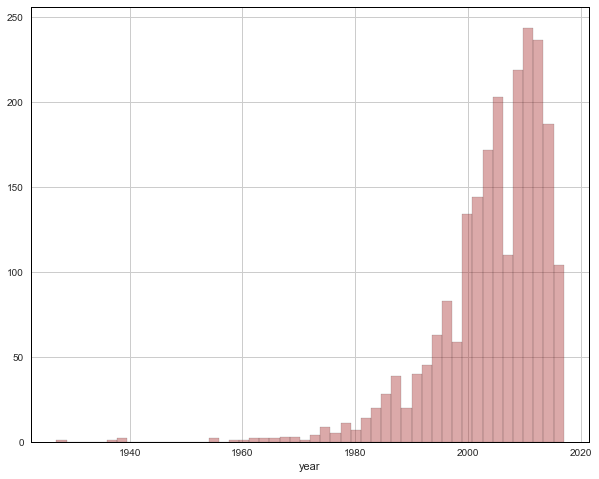

In [43]:
# number of voted movies in list by year
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})
plt.figure(figsize=(10,8))
sns.distplot(df['year'], kde=False, color='brown')

Most of the ratings are of after year 1980.

In [44]:
# average imdb rating per year from year 2000.
after_2000 = df[df['year']>=2000].groupby('year').mean()['imdb']
after_2000

year
2000    6.798438
2001    6.900000
2002    6.842466
2003    6.845000
2004    6.905435
2005    6.702041
2006    6.829524
2007    6.828182
2008    6.627103
2009    6.715179
2010    6.680342
2011    6.681102
2012    6.790476
2013    6.787121
2014    6.853922
2015    6.824706
2016    6.896471
2017    7.321053
Name: imdb, dtype: float64

In [45]:
# average imdb rating per year between 1980 and 2000.
in_1980_2000 = df[(df['year']<2000) & (df['year']>=1980)].groupby('year').mean()['imdb']
in_1980_2000

year
1980    7.614286
1981    7.516667
1982    7.575000
1983    7.457143
1984    7.423077
1985    7.408333
1986    7.406250
1987    7.421053
1988    7.310000
1989    7.255000
1990    7.254545
1991    7.422222
1992    7.295238
1993    7.283333
1994    7.407692
1995    7.237838
1996    6.950000
1997    6.786275
1998    6.925424
1999    7.017143
Name: imdb, dtype: float64

In [46]:
# Function to create new column categorizing years in decades
def sort_decades(row):
    if row >= 1980:
        return str(row)[2] + '0s'
    else:
        return 'older'
        

In [47]:
# adding new column in dataframe representing decade of release year of the movie.
df.loc[:,'decades'] = df['year'].apply(sort_decades)

In [48]:
df.head()

,movie,imdb,metascore,votes,gross,year,imdb_slots,decades
0,The Shawshank Redemption,9.3,80,1838073,28341469,1994,9,90s
1,The Dark Knight,9.0,82,1817974,533316061,2008,9,00s
2,Inception,8.8,74,1608158,292568851,2010,9,10s
3,Fight Club,8.8,66,1473065,37023395,1999,9,90s
4,Pulp Fiction,8.9,94,1438920,107930000,1994,9,90s


In [49]:
# calculating average imdb rating for movies over decades.
decade_rating = df.groupby('decades').mean()['imdb']
decade_rating

decades
00s      6.791228
10s      6.792098
80s      7.401562
90s      7.083056
older    7.852000
Name: imdb, dtype: float64

In [50]:
# sorting pandas Series by 'decade'.
decade_rating = decade_rating.reindex(['older', '80s', '90s', '00s', '10s'])
decade_rating

decades
older    7.852000
80s      7.401562
90s      7.083056
00s      6.791228
10s      6.792098
Name: imdb, dtype: float64

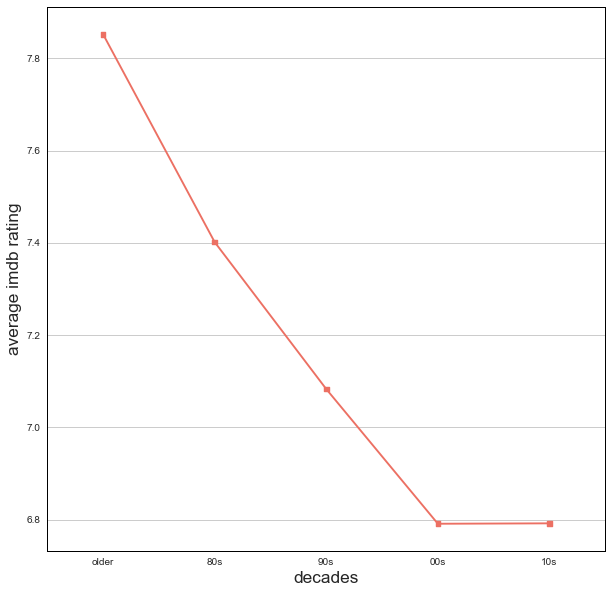

In [51]:
# plotting average imdb rating for movies over decades.

plt.figure(figsize=(10,10))
sns.pointplot(x = decade_rating.index.values, y=decade_rating.values, color='#EC7063', markers='s', scale=0.6)
plt.xlabel('decades', fontsize='xx-large')
plt.ylabel('average imdb rating', fontsize='xx-large')

Average ratings dropping down with time. Possible reason is, most of the people have started to vote on IMDB in later years. They are less likely to watch older movies with bad word-of-mouth publicity.

Movies with average rating of 5.

In [52]:
len(df[df['imdb_slots']==5])

108

In [53]:
df[df['imdb_slots']==5]

,movie,imdb,metascore,votes,gross,year,imdb_slots,decades
244,Twilight,5.2,56,364310,191449475,2008,5,00s
514,The Twilight Saga: New Moon,4.6,44,230967,296623634,2009,5,00s
618,Batman Forever,5.4,51,202283,184031112,1995,5,90s
655,The Twilight Saga: Breaking Dawn - Part 2,5.5,52,196220,292298923,2012,5,10s
667,The Twilight Saga: Eclipse,4.9,58,194460,300523113,2010,5,10s
675,Ghost Rider,5.2,35,192587,115802596,2007,5,00s
682,The Twilight Saga: Breaking Dawn - Part 1,4.9,45,191871,281275991,2011,5,10s
716,Daredevil,5.3,42,184070,431881,2003,5,00s
760,A Good Day to Die Hard,5.3,28,174422,67344392,2013,5,10s
767,The Happening,5.0,34,172616,64505912,2008,5,00s
